In [360]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd


In [361]:
# Convert file xlsx jadi file csv
df= pd.read_excel('dataset_quiz.xlsx')

# Replace data N/A dengan 0 
df = df.replace(np.nan, 0, regex=True)
df.to_csv('dataset.csv')

# Cek apakah ada data nullnya disetiap kolom
df.isnull().sum()
# Hasilnya sudah tidak ada

id_ketua              0
id_anggota1           0
id_anggota2           0
id_anggota3           0
id_anggota4           0
id_anggota5           0
keterlibatan_vltr     0
jml_vltr_terlibat     0
tahun                 0
skema                 0
luaran_hki            0
jenis_luaran_hki      0
potensi_hki           0
luaran_lain           0
jenis_luaran_lain     0
status_luaran_lain    0
dtype: int64

<h3>Nomer 1 </h3>
Buat visualisasi 5 chart

In [362]:
# Import library untuk visualisasi
import warnings #untuk mengabaikan perintah warning pada seaborn
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

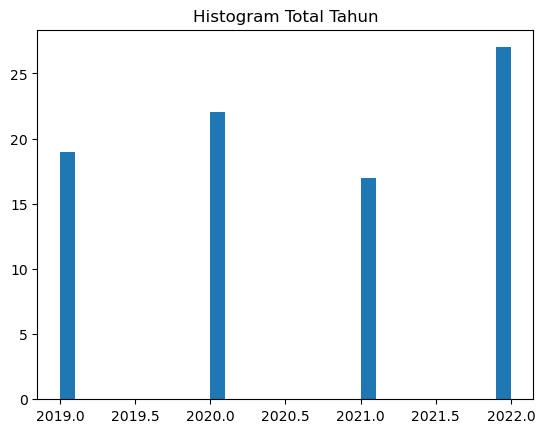

In [363]:
# Visualisasi dengan histogram (tahun)
plt.hist(df['tahun'], bins=30)
plt.title('Histogram Total Tahun')
plt.show()

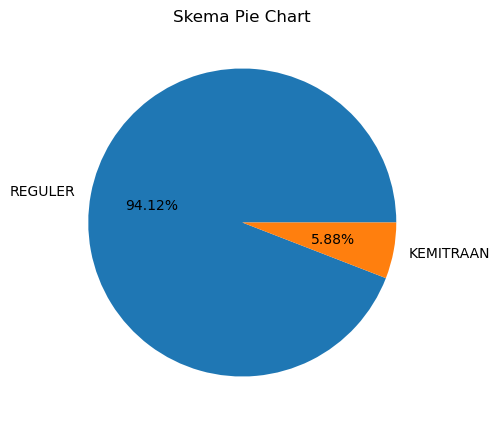

In [364]:
# Visualisasi Pie Chart (skema)
data = df['skema'].value_counts()

fig = plt.figure(figsize=(6,5))
plt.pie(data, labels=data.index, autopct='%1.2f%%')
plt.title('Skema Pie Chart')
plt.show()

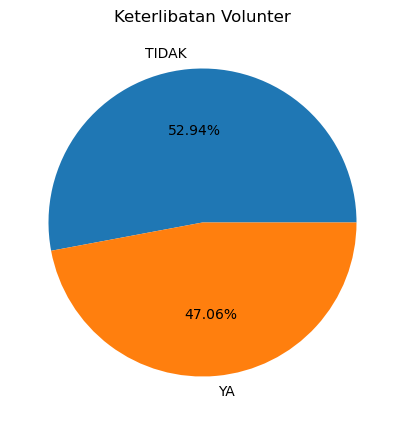

In [365]:
# Visualisasi chart (Keterlibatan)
data = df['keterlibatan_vltr'].value_counts()
plt.figure(figsize=(6,5))
plt.pie(df['keterlibatan_vltr'].value_counts(), labels=data.index, autopct='%1.2f%%')
plt.title('Keterlibatan Volunter')
plt.show()

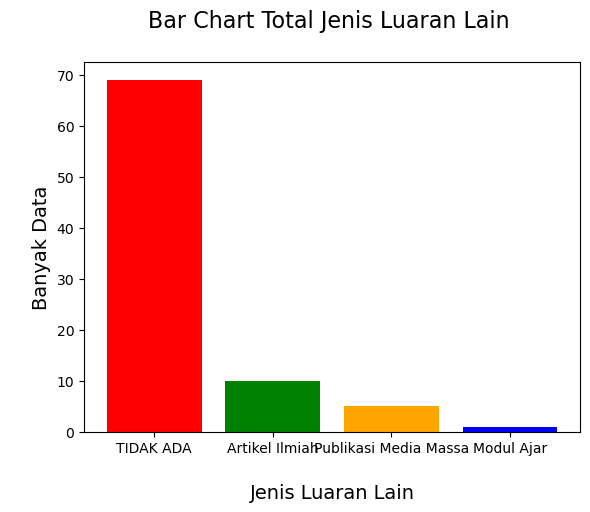

In [366]:
# Visualisasi Bar Chart ()

data = df['jenis_luaran_lain'].value_counts()

# Buat Bar Plot
plt.bar(data.index, data, color=['red','green', 'orange', "blue"])
plt.xlabel('\nJenis Luaran Lain', size=14)
plt.ylabel('\nBanyak Data', size=14)
plt.title('Bar Chart Total Jenis Luaran Lain \n', size=16)
plt.show()

Text(0, 0.5, 'Jumlah Volunter')

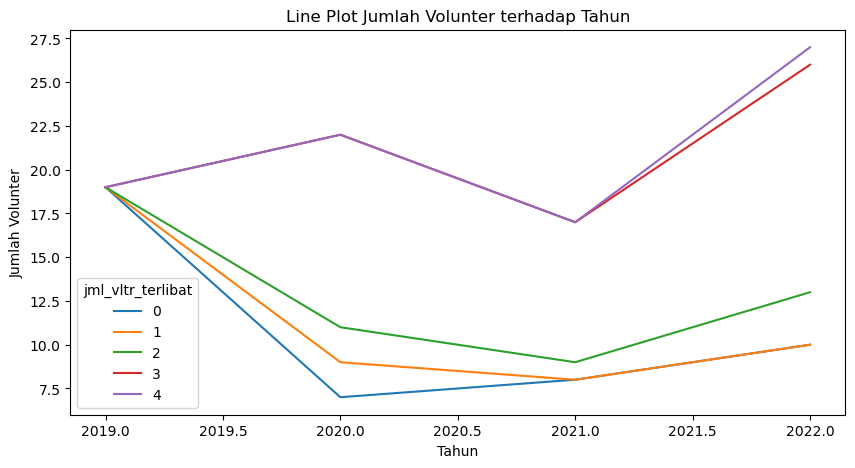

In [367]:
# Visualisasi Line plot ()
datax = df['tahun']
datay = df['jml_vltr_terlibat']

linebar = pd.crosstab(datax ,datay)

linebar.plot(kind='line', stacked=True, figsize=(10,5))
plt.title('Line Plot Jumlah Volunter terhadap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Volunter')

<h3>Nomer 2</h3>
Pemilihan data training dan testing sesuai soal

In [368]:
# Import library yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Encode semua kolom dari dataset
df['skema']=encoder.fit_transform(df['skema'])
df['luaran_hki']=encoder.fit_transform(df['luaran_hki'])
df['jenis_luaran_hki']=encoder.fit_transform(df['jenis_luaran_hki'])
df['potensi_hki']=encoder.fit_transform(df['potensi_hki'])
df['luaran_lain']=encoder.fit_transform(df['luaran_lain'])
df['jenis_luaran_lain']=encoder.fit_transform(df['jenis_luaran_lain'])
df['status_luaran_lain']=encoder.fit_transform(df['status_luaran_lain'])

# Menyiapkan data training dan testing dengan kolom keterlibatan_vltr
df['keterlibatan_vltr']=encoder.fit_transform(df['keterlibatan_vltr'])

# Drop kolom keterlibatan_vltr dari dataset
X = df.drop(['keterlibatan_vltr'], axis=1)
y = df['keterlibatan_vltr']
# Dummies data
X = pd.get_dummies(X)

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

from sklearn.preprocessing import MinMaxScaler
# Melakukan Normalisasi Data

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h3>Nomer 3</h3>
Tentukan data validasi!

In [369]:
# Implementasi k-fold cross validation (random) dengan training dan testing saja
from sklearn.model_selection import KFold

# inisiasi obyek kfold
kf = KFold(n_splits=4)
print(f'Jumlah fold: {kf.get_n_splits()}')
print(f'Obyek KFold: {kf}')

# Lakukan splitting dengan KFold
kf_split = kf.split(df)
print(f'Jumlah data df: {df.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 85
Index train: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45
 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84] | Index test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Index train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84] | Index test: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Index train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84] | Index test: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Index train: [ 0  1  2  3  4  5  6  7

<h3>Nomer 4</h3>
Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! 

In [370]:
# import library yang diperlukan
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Menggunakan Random Forest
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print('Random Forest')
print('Akurasi Score : ',accuracy_score(y_test, rfc_pred))

Random Forest
Akurasi Score :  0.9411764705882353


In [371]:
# Menggunakan Decision TreDecisionTreeClassifiere
from sklearn.tree import DecisionTreeClassifier

# Memanggil model decision tree dengan nama dt dan berparamater
# Parameter yang digunakan yaitu kedalaman maksimum = 6 dan menggunakan random state/kolom = 1
dt = DecisionTreeClassifier(max_depth = 6, random_state = 1)
# Menggunakan fungsi fit untuk menyesuaikan model dt dengan data training
dt.fit(X_train, y_train)

# Menentukan hasil prediksi dari x_test
dt_pred = dt.predict(X_test)

# Print accuracy
print('Decision Tree Classifier')
print("Akurasi Score : {:.2f}".format(accuracy_score(y_test, dt_pred)))

Decision Tree Classifier
Akurasi Score : 1.00


In [372]:
# Perbandingan Akurasi Score
print("Akurasi Decision Tree Classifier : {:.2f}".format(accuracy_score(y_test, dt_pred)))
print('Akurasi Random Forest Classifier : ',accuracy_score(y_test, rfc_pred))

Akurasi Decision Tree Classifier : 1.00
Akurasi Random Forest Classifier :  0.9411764705882353


<h3>Nomer 5</h3>
Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan!

In [373]:
# Terapkan Sebuah Metode Prediksi Berdasarkan Tahun 
# Membuat Prediksi Keterlibatan Volunter
tahun = 2021
predict = df[df['tahun'] == tahun]
predict = predict.drop(['keterlibatan_vltr'], axis=1)

predict = scaler.transform(predict)
predict = rfc.predict(predict)

# Menampilkan Hasil Prediksi dan decode prediksi
print('Prediksi Keterlibatan Volunter pada Tahun',tahun,'adalah')
print(encoder.inverse_transform(predict))
# Hitung Akurasi Prediksi
from sklearn.metrics import accuracy_score
print('Akurasi Prediksi : ',accuracy_score(y_test, rfc_pred))

Prediksi Keterlibatan Volunter pada Tahun 2021 adalah
['YA' 'TIDAK' 'TIDAK' 'YA' 'YA' 'YA' 'YA' 'YA' 'YA' 'TIDAK' 'TIDAK'
 'TIDAK' 'YA' 'YA' 'TIDAK' 'TIDAK' 'TIDAK']
Akurasi Prediksi :  0.9411764705882353


<h3>Nomer 6</h3>
Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4

Confusion Matrix KNN :  [[8 0]
 [0 9]]
Confusion Matrix Random Forest :  [[8 0]
 [1 8]]
ROC KNN :  1.0
ROC Random Forest :  0.9444444444444444
Confusion Matrix KNN


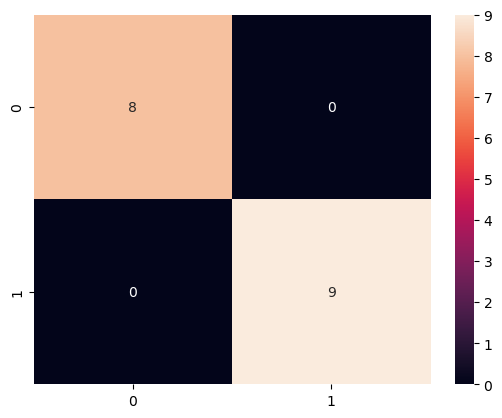

Confusion Matrix Random Forest


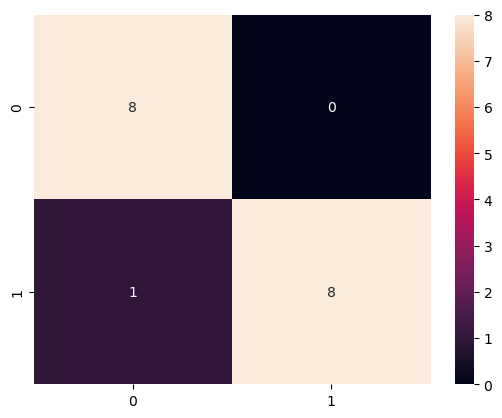

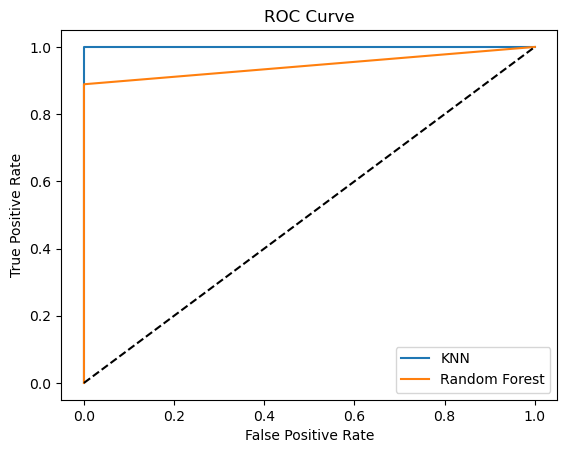

In [374]:
# Membuat Confusion Matrix dan ROC AUC dari KNN dan Random Forest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Confusion Matrix
print('Confusion Matrix KNN : ',confusion_matrix(y_test, dt_pred))
print('Confusion Matrix Random Forest : ',confusion_matrix(y_test, rfc_pred))

# ROC
print('ROC KNN : ',roc_auc_score(y_test, dt_pred))
print('ROC Random Forest : ',roc_auc_score(y_test, rfc_pred))


# Membuat Visualisasi Confusion Matrix dan ROC
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
print('Confusion Matrix KNN')
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot=True)
plt.show()

print('Confusion Matrix Random Forest')
cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(cm, annot=True)
plt.show()

# ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, dt_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, rfc_pred)
plt.plot(fpr, tpr, label='KNN')
plt.plot(fpr2, tpr2, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<h3>Nomer 7</h3>
Lakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan metode Grid Search, Random Search, dan Exhausive Search

In [375]:
# lakukan hyperparameter tuning Menggunakan Metode GridSearchCV,RandomizedSearchCV,ExhaustiveSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# GridSearchCV
# Mencari parameter terbaik untuk Random Forest
param_grid = {    
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(5,10))
    }

grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,cv=kf)
grid.fit(X_train, y_train)

%timeit grid.fit(X, y)

# Evaluasi dengan score
score = grid.score(X,y)

print('Random Forest')
print('GridSearchCV')
print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {grid.best_params_}')

5.2 s ± 166 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Random Forest
GridSearchCV
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'criterion': 'entropy', 'max_depth': 9}


In [376]:
# Random Search
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(5,10))
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
rs = RandomizedSearchCV(rfc, param_distributions=params, cv=kf,
                        n_iter=10, scoring="accuracy", n_jobs=-1, return_train_score=True)

# Fit / latih berdasarkan random
# %timeit merupakan magic command didalam ipython notebook
# yang dapat kita gunakan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur

%timeit rs.fit(X, y)

# Evaluasi dengan score
score = rs.score(X, y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {rs.best_params_}')

1.42 s ± 44.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'max_depth': 7, 'criterion': 'entropy'}


In [377]:
#Exchived Search
from sklearn.svm import SVC 
# Setelah melakukan beberapa percobaan kombinasi hyperparameter,
# hasil evaluasi terbaik didapatkan dengan konfigurasi hyperparameter sebagai berikut
ms = SVC(kernel="linear", C=100)

# Fit / latih berdasarkan random
# %timeit merupakan magic command didalam ipython notebook
# yang dapat kita gunakan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur

%timeit ms.fit(X, y)

# Evaluasi dengan score
score = ms.score(X, y)

print(f'Hasil evaluasi: {score}')

# Menggunakan hyperparameter gamma dan kernel rbf
msg = SVC(kernel="rbf", C=100, gamma=0.001)

%timeit msg.fit(X, y)
score = msg.score(X, y)

print(f'Hasil evaluasi dengan gamma: {score}')

915 ms ± 15.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 0.9647058823529412
1.22 ms ± 6.23 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Hasil evaluasi dengan gamma: 1.0


<h3>Nomer 8</h3>
Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)

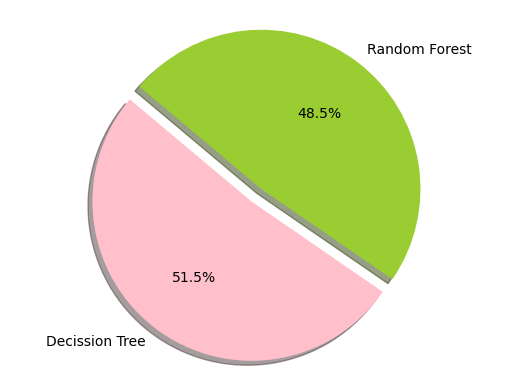

In [378]:
# Membuat Visualisasi Perbandingan antara Decision Tree dan Random Forest
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
labels = 'Decission Tree', 'Random Forest'
sizes = [accuracy_score(y_test, dt_pred), accuracy_score(y_test, rfc_pred)]
colors = ['pink', 'yellowgreen', ]
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

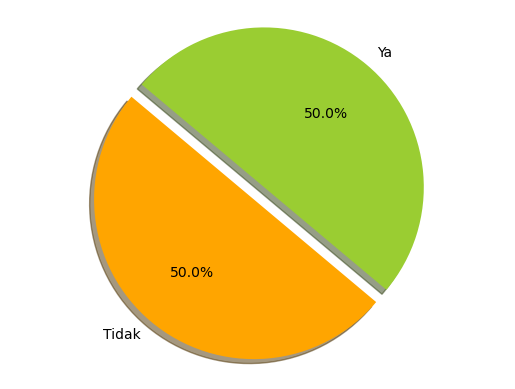

In [387]:
# Visualisasi Hasil Prediksi
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
labels = 'Tidak', 'Ya'
sizes = [accuracy_score(y_test, predict), accuracy_score(y_test, predict)]
colors = ['orange', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# arr = encoder.inverse_transform(predict)

# print(arr.)

